## Statistical Data Analysis - MLB Pitches Dataset

In this notebook, we will explore a number of continuous variables in the MLB Pitches Dataset to see which of the variables correlates most significantly to our 'fastball' target variables.

We will start by loading the relevant python packages and the dataset:

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

In [3]:
df = pd.read_csv('df_final.csv')

In [58]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,g_id,inning,o,p_score,pitcher_id,p_throws_num,stand_num,top_num,type_B,type_S,type_X,fastball
count,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.865071e+06,2.865071e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.852965e+06,2.853012e+06,2.853012e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06
mean,1.433576e+06,1.433576e+06,1.433576e+06,1.433576e+06,6.572638e-03,2.254938e+00,8.838124e+01,8.136273e+01,1.731173e+03,1.802308e+02,5.848094e+00,6.522622e+00,2.381685e+01,-2.308512e+00,2.649175e+01,-2.278275e+01,1.566689e+00,3.435719e+00,1.550896e+00,2.282811e+00,-1.288567e+02,-4.420795e+00,1.159975e+02,-7.189111e-01,1.758503e+02,5.000000e+01,5.814139e+00,-1.139971e+00,5.046326e+00,4.442669e+01,9.819750e+00,3.129711e+02,2.256608e+00,2.016606e+09,8.824259e-01,8.810873e-01,9.826033e-01,2.894472e+00,3.018314e-01,1.860451e-01,9.595543e-02,5.202658e+05,2.016525e+08,5.006868e+00,1.673523e+00,2.293307e+00,5.274988e+05,7.319575e-01,5.809416e-01,5.090396e-01,3.645169e-01,4.565032e-01,1.789799e-01,3.539667e-01
std,8.276762e+05,8.276762e+05,8.276762e+05,8.276762e+05,8.905373e-01,9.440522e-01,6.000716e+00,5.350838e+00,6.810606e+02,6.726154e+01,2.437567e+01,2.863161e+00,6.446540e-02,1.074066e+01,4.142729e+00,8.865066e+00,1.549407e-01,2.172590e-01,5.537377e-01,5.990039e+00,8.726126e+00,3.067389e+00,3.409448e+01,1.728592e+00,2.960411e+01,3.118284e-14,4.578852e-01,6.275731e+00,5.187005e+00,1.683662e+01,4.060956e+00,1.928482e+02,2.550955e+00,1.117238e+06,9.665457e-01,8.251786e-01,8.174947e-01,1.726595e+00,4.590526e-01,3.891431e-01,2.945302e-01,8.121276e+04,1.115803e+05,2.669174e+00,9.528891e-01,2.633267e+00,7.752456e+04,4.429399e-01,4.934051e-01,4.999184e-01,4.812945e-01,4.981045e-01,3.833356e-01,4.781991e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.054333e+01,-5.183664e+00,3.390000e+01,3.240000e+01,1.214000e+00,-2.000000e-03,-9.000000e+01,1.000000e-01,2.330000e+01,-5.929009e+01,-5.243748e-01,-7.717142e+01,-7.921409e+00,-1.849129e+00,0.000000e+00,-2.486900e+01,-1.533620e+02,-1.977060e+01,0.000000e+00,-9.556000e+00,0.000000e+00,5.000000e+01,-1.941000e+00,-2.809165e+01,-7.020600e+01,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.015000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.125260e+05,2.015000e+08,1.000000e+00,0.000000e+00,0.000000e+00,1.125260e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.167882e+05,7.167882e+05,7.167882e+05,7.167882e+05,-5.878259e-01,1.653958e+00,8.430000e+01,7.800000e+01,1.242986e+03,1.374250e+02,-1.180000e+01,4.300000e+00,2.380000e+01,-1.129000e+01,2.346000e+01,-2.871775e+01,1.485351e+00,3.300000e+00,9.060000e-01,-2.081861e+00,-1.355100e+02,-6.513000e+00,9.342000e+01,-1.955000e+00,1.606500e+02,5.000000e+01,5.564194e+00,-6.450000e+00,2.160000e+00,3.200000e+01,6.000000e+00,1.490000e+02,0.000000e+00,2.016004e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.577270e+05,2.016000e+08,3.000000e+00,1.000000e+00,0.000000e+00,4.621360e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.433576e+06,1.433576e+06,1.433

In [59]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event', 'g_id',
       'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top',
       'p_throws_num', 'stand_num', 'top_num', 'type_B', 'type_S', 'type_X',
       'fastball'],
      dtype='object')

We can see from above that the dataset has a number of continuous variables that provide specific data for each pitch (such as speed, spin rate, location).  Before beginning any variable-specific analysis, we must first divide the dataset into two subsets of fastballs and non-fastballs:

In [4]:
df_fastball = df[df['fastball'] == 1]
df_nofastball = df[df['fastball'] == 0]

## Continuous Variables

For each continuous variable, we will start by calcuating the mean, median, and std for the entire dataset as well as for each of the fastball and non-fastball datasets for an initial comparison.  We can then run permutation and bootstrap p-tests to confirm whether each variable is statistically significant.  As a preliminary step, we can code some functions to run the tests:

In [61]:
def ecdf(data):
    x=np.sort(data)
    y=np.arange(1, len(x) + 1) / len(x)
    return x, y

def graph_ecdfs(variable, x_label, graph_title):
    x, y = ecdf(df['{}'.format(variable)])
    _ = sns.set()
    _ = plt.plot(x, y, marker='.', linestyle='none', label='all pitches')
    _ = plt.xlabel('{}'.format(x_label))
    _ = plt.ylabel('ECDF')
    _ = plt.title('{}'.format(graph_title), size='large')

    x_fast, y_fast = ecdf(df_fastball['{}'.format(variable)])
    _ = plt.plot(x_fast, y_fast, marker='.', linestyle='none', label='fastballs')

    x_nofast, y_nofast = ecdf(df_nofastball['{}'.format(variable)])
    _ = plt.plot(x_nofast, y_nofast, marker='.', linestyle='none', label='non-fastballs')

    _ = plt.legend()

def calculate_stats(df, df_fastball, df_nofastball):
    df_mean = np.mean(df)
    df_median = np.nanmedian(df)
    df_std = np.std(df)
    print("all pitches mean = {}".format(df_mean))
    print('all pitches median = {}'.format(df_median))
    print('all pitches std = {}'.format(df_std))

    df_fastball_mean = np.mean(df_fastball)
    df_fastball_median = np.nanmedian(df_fastball)
    df_fastball_std = np.std(df_fastball)
    print("fastballs mean = {}".format(df_fastball_mean))
    print('fastballs median = {}'.format(df_fastball_median))
    print('fastballs std = {}'.format(df_fastball_std))

    df_nofastball_mean = np.mean(df_nofastball)
    df_nofastball_median = np.nanmedian(df_nofastball)
    df_nofastball_std = np.std(df_nofastball)
    print("non-fastballs mean = {}".format(df_nofastball_mean))
    print('non-fastballs median = {}'.format(df_nofastball_median))
    print('non-fastballs std = {}'.format(df_nofastball_std))

def perm_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permutated_data = np.random.permutation(data)
    perm_sample1 = permutated_data[:len(data1)]
    perm_sample2 = permutated_data[len(data1):]
    return perm_sample1, perm_sample2

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample1, perm_sample2 = perm_sample(data1, data2)
        perm_replicates[i] = func(perm_sample1, perm_sample2)
    return perm_replicates

def diff_in_means(data1, data2):
    return np.absolute(np.mean(data1) - np.mean(data2))

def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range (size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates


### Starting Pitch Speed

In [62]:
# Calculating mean/median/std of each dataset

calculate_stats(df['start_speed'], df_fastball['start_speed'], df_nofastball['start_speed'])

all pitches mean = 88.38123659208908
all pitches median = 89.7
all pitches std = 6.0007146327634855
fastballs mean = 92.86186247200206
fastballs median = 92.9
fastballs std = 2.7927422313161023
non-fastballs mean = 85.92626676244947
non-fastballs median = 86.2
non-fastballs std = 5.868383102332953


In [9]:
np.cov(df['fastball'], df['break_length'])

array([[ 0.22867435, -0.88863915],
       [-0.88863915,  8.19769175]])

In [15]:
np.corrcoef(df['fastball'], df['spin_dir'])

array([[ 1.        ,  0.12495078],
       [ 0.12495078,  1.        ]])

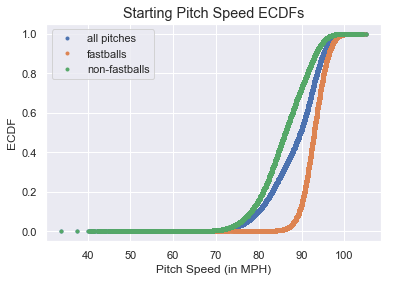

In [63]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('start_speed', 'Pitch Speed (in MPH)', 'Starting Pitch Speed ECDFs')


As we can see from the calculations and ECDF graph above, the mean pitch speed for fastballs is significantly higher than the non-fastballs.  This variable appears to be quite statistically significant.  I expect to get a p-value of 0 for the hypothesis tests:

In [64]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['start_speed']) - np.mean(df_fastball['start_speed']))

perm_replicates = draw_perm_reps(df['start_speed'], df_fastball['start_speed'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 4.480625879912978
The p-value is 0.0


In [65]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['start_speed'])
fastball_mean = np.mean(df_fastball['start_speed'])

translated_data = df_fastball['start_speed'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


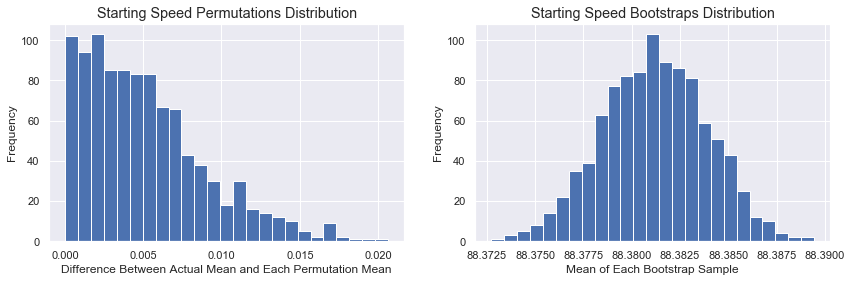

In [66]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Starting Speed Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Starting Speed Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')



As expected, the hypothesis tests confirm that start pitch speed is statistically significant as the fastball mean of over 92 MPH is much faster than the mean start speed for the non-fastballs.  From the distributions graphed above, it is likely that we would never get a permutation or bootstrapped sample more extreme than 92 MPH.

### Ending Pitch Speed

In [67]:
# Calculating mean/median/std of each dataset
calculate_stats(df['end_speed'], df_fastball['end_speed'], df_nofastball['end_speed'])

all pitches mean = 81.36273145430658
all pitches median = 82.5
all pitches std = 5.350836608144508
fastballs mean = 85.17134194586998
fastballs median = 85.2
fastballs std = 2.594727733084128
non-fastballs mean = 79.27596409176905
non-fastballs median = 79.7
non-fastballs std = 5.322378752668014


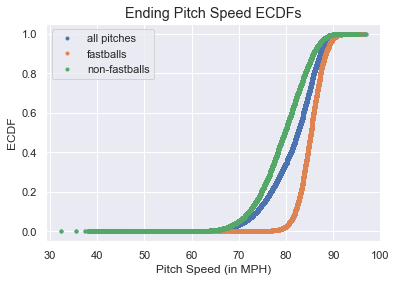

In [68]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('end_speed', 'Pitch Speed (in MPH)', 'Ending Pitch Speed ECDFs')

The ending speed variable appears to have the same significance as the starting speed variable, which makes practical sense.  I therefore expect the ending speed variable hypothesis tests to result in a p-value of 0:

In [69]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['end_speed']) - np.mean(df_fastball['end_speed']))

perm_replicates = draw_perm_reps(df['end_speed'], df_fastball['end_speed'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 3.8086104915633996
The p-value is 0.0


In [70]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['end_speed'])
fastball_mean = np.mean(df_fastball['end_speed'])

translated_data = df_fastball['end_speed'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


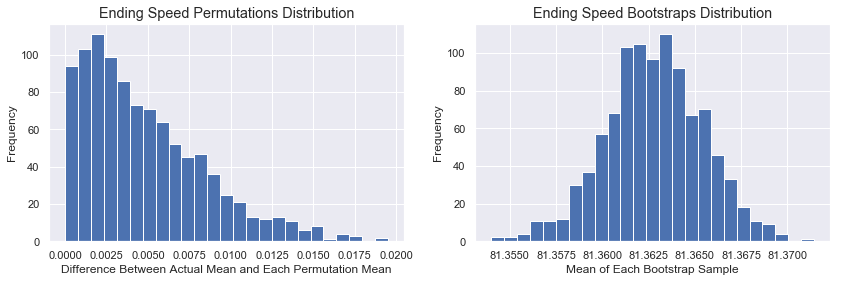

In [71]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Ending Speed Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Ending Speed Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

As expected, the hypothesis tests confirm that end pitch speed is statistically significant as the fastball mean of over 85 MPH is much faster than the mean end speed for the non-fastballs.

### Pitch Break Length

In [72]:
# Calculating mean/median/std of each dataset
calculate_stats(df['break_length'], df_fastball['break_length'], df_nofastball['break_length'])

all pitches mean = 6.522622147255763
all pitches median = 6.0
all pitches std = 2.86316064720439
fastballs mean = 4.01210668879075
fastballs median = 4.0
fastballs std = 0.9525342749272147
non-fastballs mean = 7.898153127201478
non-fastballs median = 7.3
non-fastballs std = 2.616631555461624


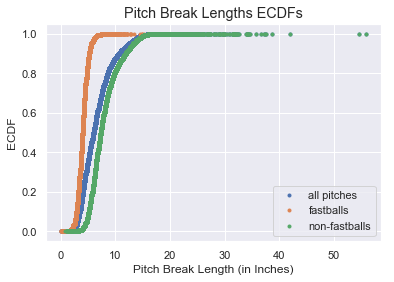

In [73]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('break_length', 'Pitch Break Length (in Inches)', 'Pitch Break Lengths ECDFs')

The break length of fastballs appears to be significantly shorter than that of non-fastballs.  I therefore expect the hypothesis tests to generate a p-value of 0:

In [74]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['break_length']) - np.mean(df_fastball['break_length']))

perm_replicates = draw_perm_reps(df['break_length'], df_fastball['break_length'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 2.5105154584650133
The p-value is 0.0


In [102]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['break_length'])
fastball_mean = np.mean(df_fastball['break_length'])

translated_data = df_fastball['break_length'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates < fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


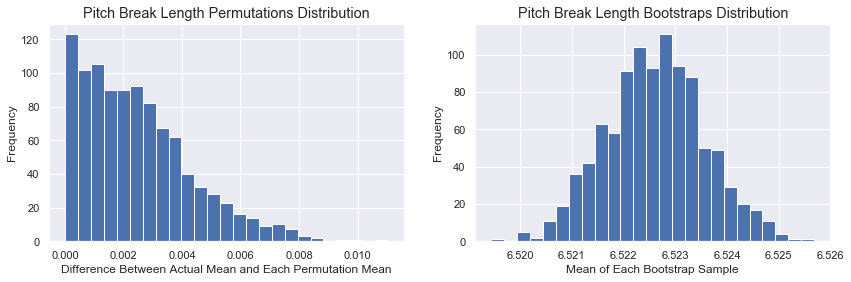

In [76]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Pitch Break Length Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Pitch Break Length Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

The hypothesis tests confirm that the break length of fastballs is considerably shorter than that of other pitch types, making this variable statistically significant.

### Pitch Break Angles

In [77]:
# Calculating mean/median/std of each dataset
calculate_stats(df['break_angle'], df_fastball['break_angle'], df_nofastball['break_angle'])

all pitches mean = 5.84809366709829
all pitches median = 6.5
all pitches std = 24.37566773823948
fastballs mean = 11.08337522675151
fastballs median = 18.9
fastballs std = 26.460898603553527
non-fastballs mean = 2.9796421107634394
non-fastballs median = -0.4
non-fastballs std = 22.64611469919619


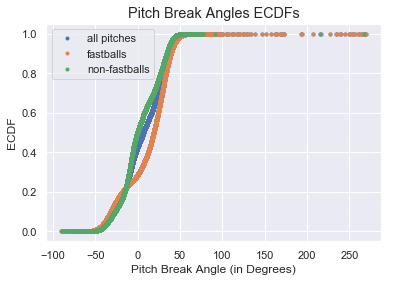

In [78]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('break_angle', 'Pitch Break Angle (in Degrees)', 'Pitch Break Angles ECDFs')

The mean break angle for fastballs is approximately 11 degrees, which is almost double the mean break angle for the entire dataset.  I therefore believe that the difference is significant enough to generate p-values of 0:

In [79]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['break_angle']) - np.mean(df_fastball['break_angle']))

perm_replicates = draw_perm_reps(df['break_angle'], df_fastball['break_angle'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 5.23528155965322
The p-value is 0.0


In [80]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['break_angle'])
fastball_mean = np.mean(df_fastball['break_angle'])

translated_data = df_fastball['break_angle'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


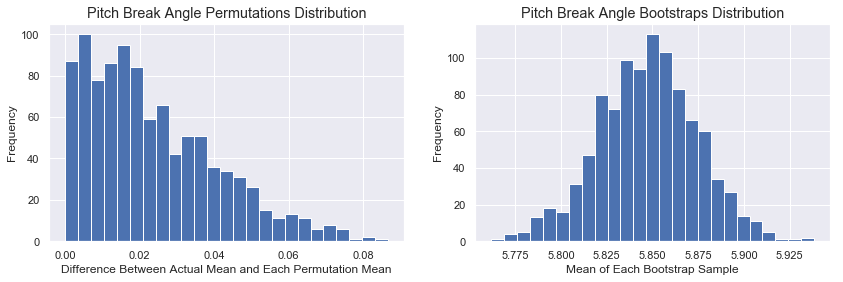

In [81]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Pitch Break Angle Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Pitch Break Angle Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

As expected, the break angle of a pitch appears to be statistically significant to whether it is a fastball or non-fastball.

### Horizontal Pitch Location

In [82]:
# Calculating mean/median/std of each dataset
calculate_stats(df['px'], df_fastball['px'], df_nofastball['px'])

all pitches mean = 0.006572638050106266
all pitches median = 0.007660961113344931
all pitches std = 0.8905370966851739
fastballs mean = -0.008500412032881466
fastballs median = -0.00309826951206978
fastballs std = 0.821526921242899
non-fastballs mean = 0.014831279629673389
non-fastballs median = 0.013999999999999999
non-fastballs std = 0.9260663310007312


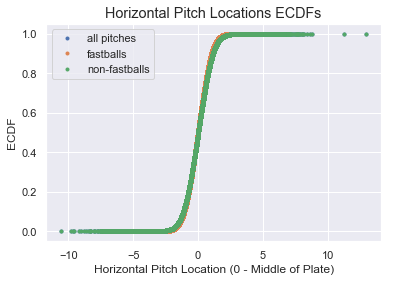

In [83]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('px', 'Horizontal Pitch Location (0 - Middle of Plate)', 'Horizontal Pitch Locations ECDFs')


While not apparent from the ECDF graph, the mean horizontal pitch location for fastballs is -0.0085 and 0.0066 for all pitches.  I expect this spread to be wide enough for the horizontal pitch location variable to be statistically significant.

In [84]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['px']) - np.mean(df_fastball['px']))

perm_replicates = draw_perm_reps(df['px'], df_fastball['px'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 0.015073050082987732
The p-value is 0.0


In [85]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['px'])
fastball_mean = np.mean(df_fastball['px'])

translated_data = df_fastball['px'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates < fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


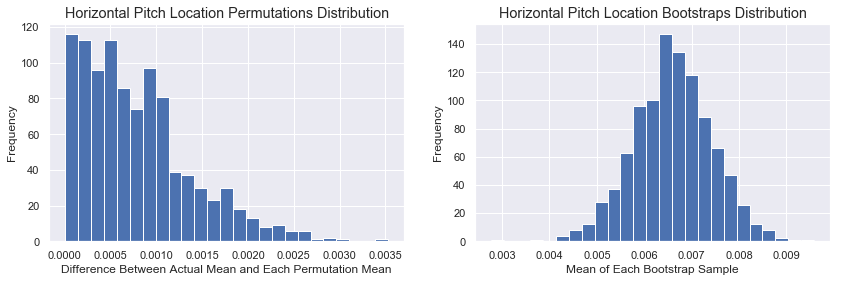

In [86]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Horizontal Pitch Location Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Horizontal Pitch Location Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

The p-values above confirm the statistical significance of the horizontal pitch location variable.

### Vertical Pitch Location

In [87]:
# Calculating mean/median/std of each dataset
calculate_stats(df['pz'], df_fastball['pz'], df_nofastball['pz'])

all pitches mean = 2.2549376967959804
all pitches median = 2.2532815933332104
all pitches std = 0.9440520061677724
fastballs mean = 2.6064157036156352
fastballs median = 2.58400788258397
fastballs std = 0.8458303946652277
non-fastballs mean = 2.062360158378384
non-fastballs median = 2.0753474281511997
non-fastballs std = 0.9395670892788143


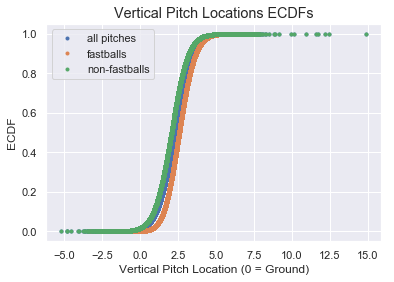

In [88]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('pz', 'Vertical Pitch Location (0 = Ground)', 'Vertical Pitch Locations ECDFs')

Similar to horizontal pitch location, the mean vertical pitch location of fastballs of 2.6 appears to significantly higher than the mean vertical pitch location of all pitches of 2.25.  I therefore expect the hypothesis tests to confirm this significance:

In [89]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['pz']) - np.mean(df_fastball['pz']))

perm_replicates = draw_perm_reps(df['pz'], df_fastball['pz'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 0.3514780068196548
The p-value is 0.0


In [90]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['pz'])
fastball_mean = np.mean(df_fastball['pz'])

translated_data = df_fastball['pz'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


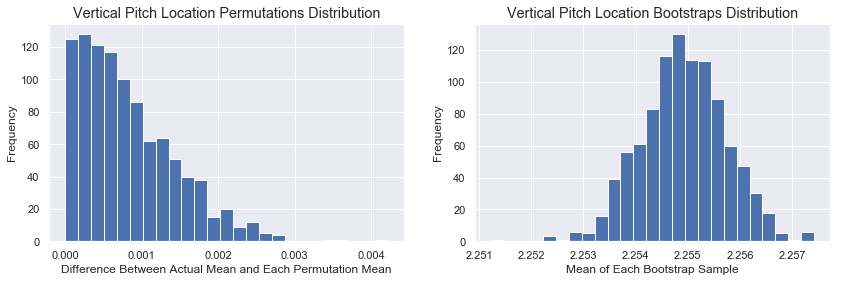

In [91]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Vertical Pitch Location Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Vertical Pitch Location Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

Similar to the horizontal pitch location, the vertical pitch location variable appears to be statistically significant.

### Pitch Spin Rate

In [92]:
# Calculating mean/median/std of each dataset
calculate_stats(df['spin_rate'], df_fastball['spin_rate'], df_nofastball['spin_rate'])

all pitches mean = 1731.1728745329574
all pitches median = 1862.01
all pitches std = 681.0605246780366
fastballs mean = 2161.1014153469314
fastballs median = 2182.119
fastballs std = 409.18548985277164
non-fastballs mean = 1495.6116773062624
non-fastballs median = 1544.6770000000001
non-fastballs std = 685.1901897297274


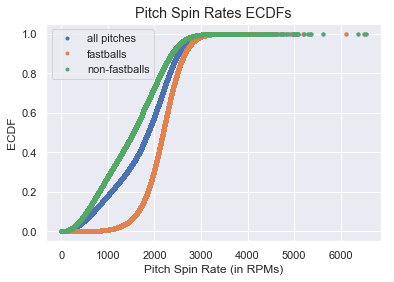

In [93]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('spin_rate', 'Pitch Spin Rate (in RPMs)', 'Pitch Spin Rates ECDFs')

The mean fastball spin rate is over 300 rotations more per minute than the total pitches mean spin rate.  This variable is almost certainly statistically significant.

In [94]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['spin_rate']) - np.mean(df_fastball['spin_rate']))

perm_replicates = draw_perm_reps(df['spin_rate'], df_fastball['spin_rate'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 429.928540813974
The p-value is 0.0


In [95]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['spin_rate'])
fastball_mean = np.mean(df_fastball['spin_rate'])

translated_data = df_fastball['spin_rate'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


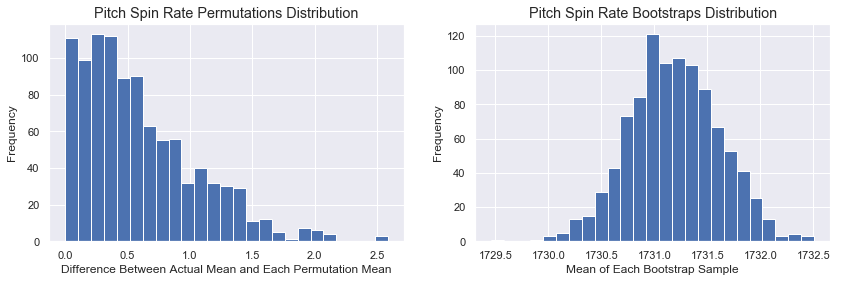

In [96]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Pitch Spin Rate Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Pitch Spin Rate Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

Both hypothesis tests confirm that the spin rate of fastballs is statistically significant as they spin much faster on average than other pitch types.

### Pitch Spin Direction

In [97]:
# Calculating mean/median/std of each dataset
calculate_stats(df['spin_dir'], df_fastball['spin_dir'], df_nofastball['spin_dir'])

all pitches mean = 180.23080242434693
all pitches median = 195.5225
all pitches std = 67.26152804317726
fastballs mean = 191.5848825138427
fastballs median = 199.85
fastballs std = 28.19716109920296
non-fastballs mean = 174.00981347981812
non-fastballs median = 180.23
non-fastballs std = 80.36134159022161


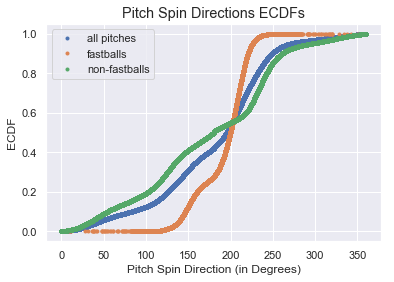

In [98]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdfs('spin_dir', 'Pitch Spin Direction (in Degrees)', 'Pitch Spin Directions ECDFs')

Similar to the other variables, the pitch spin direction of fastballs of 190 degrees appears to be significantly different than the mean pitch spin direction of the entire dataset.  I expect the p-values to be 0:

In [99]:
# Generating a Permutation Test for Hypothesis

actual_diff_in_mean = np.absolute(np.mean(df['spin_dir']) - np.mean(df_fastball['spin_dir']))

perm_replicates = draw_perm_reps(df['spin_dir'], df_fastball['spin_dir'], diff_in_means, size=1000)

p = np.sum(perm_replicates > actual_diff_in_mean) / len(perm_replicates)

print('The difference in means between the observed data is {}'.format(actual_diff_in_mean))
print('The p-value is {}'.format(p))

The difference in means between the observed data is 11.354080089495767
The p-value is 0.0


In [100]:
# Generating a Bootstrap Test for Hypothesis

all_pitches_mean = np.mean(df['spin_dir'])
fastball_mean = np.mean(df_fastball['spin_dir'])

translated_data = df_fastball['spin_dir'] - fastball_mean + all_pitches_mean

bs_replicates = draw_bs_reps(translated_data, np.mean, size=1000)

p = np.sum(bs_replicates > fastball_mean) / len(bs_replicates)

print('The p-value is {}'.format(p))

The p-value is 0.0


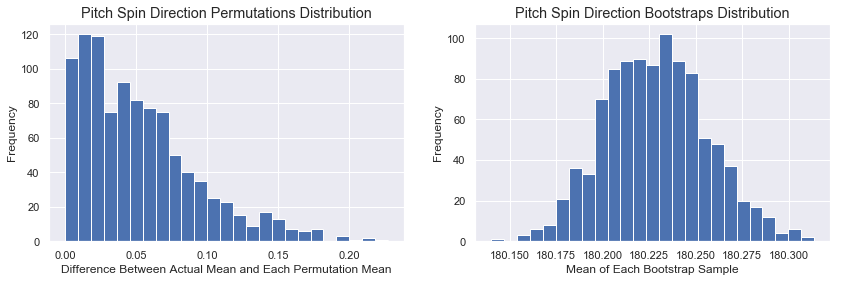

In [101]:
# Graphing the results of the hypothesis tests
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = plt.subplot(1,2,1)
_ = plt.hist(perm_replicates, bins=25)
_ = plt.title('Pitch Spin Direction Permutations Distribution', size='large')
_ = plt.xlabel('Difference Between Actual Mean and Each Permutation Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(1,2,2)
_ = plt.hist(bs_replicates, bins=25)
_ = plt.title('Pitch Spin Direction Bootstraps Distribution', size='large')
_ = plt.xlabel('Mean of Each Bootstrap Sample')
_ = plt.ylabel('Frequency')

As predicted, the hypothesis tests confirm that the pitch spin direction variable is statistically significant.

## Conclusion

All of the continuous variables analyzed are statistically significant to determining whether a pitch is a fastball.  This conclusion makes sense when considering that the dataset contains observations of nearly 3 million pitches.  With that many data points in the observed dataset, we should expect each variable to converge on or very close to its true mean and standard deviation.  Therefore, even the slightest variations in the variables between fastballs and non-fastballs are likely to be indicative of a truly significant difference.

In [ ]:
# Dividing the data up based on runners on base
df_norunner = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
df_on_1b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
df_on_2b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
df_on_3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
df_on_1b2b = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
df_on_1b3b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
df_on_2b3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]
df_allrunner = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]